In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# ex.1
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# ex.2
Y_predicted = regr.predict(X_test)
 
# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)
 
#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
Residual sum of squares: 20.869292183770682


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = (np.sqrt(mean_squared_error(Y_test, Y_predicted)))
r2 = r2_score(Y_test, Y_predicted)

print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

MSE is 4.568292042303193
R2 score is 0.7334492147453092




Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

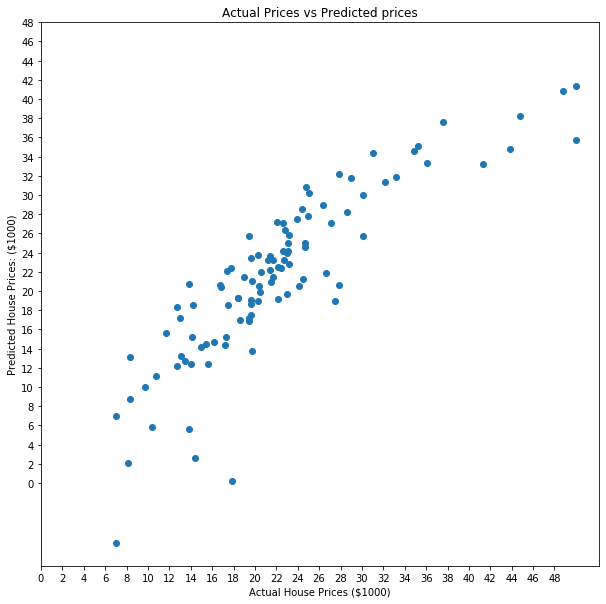

In [51]:
# ex.3
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_predicted)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(Y_test)),2))
plt.yticks(range(0, int(max(Y_test)),2))
plt.title("Actual Prices vs Predicted prices")